<!-- Centered logo -->
<p align="center">
  <img src="https://github.com/erdogant/bnlearn/blob/master/docs/figs/logo.png?raw=true" width="300" />
</p>

<!-- Badges row (centered) -->
<p align="center">
  <a href="https://img.shields.io/pypi/pyversions/bnlearn"><img src="https://img.shields.io/pypi/pyversions/bnlearn" /></a>
  <a href="https://pypi.org/project/bnlearn/"><img src="https://img.shields.io/pypi/v/bnlearn" /></a>
  <img src="https://img.shields.io/github/stars/erdogant/bnlearn" />
  <a href="https://github.com/erdogant/bnlearn/blob/master/LICENSE"><img src="https://img.shields.io/badge/license-MIT-green.svg" /></a>
  <a href="https://github.com/erdogant/bnlearn/network"><img src="https://img.shields.io/github/forks/erdogant/bnlearn.svg" /></a>
  <a href="https://github.com/erdogant/bnlearn/issues"><img src="https://img.shields.io/github/issues/erdogant/bnlearn.svg" /></a>
  <a href="http://www.repostatus.org/#active"><img src="http://www.repostatus.org/badges/latest/active.svg" /></a>
  <a href="https://pepy.tech/project/bnlearn/"><img src="https://pepy.tech/badge/bnlearn/month" /></a>
  <a href="https://pepy.tech/project/bnlearn/"><img src="https://pepy.tech/badge/bnlearn" /></a>
  <a href="https://zenodo.org/badge/latestdoi/231263493"><img src="https://zenodo.org/badge/231263493.svg" /></a>
  <a href="https://erdogant.github.io/bnlearn/"><img src="https://img.shields.io/badge/Sphinx-Docs-Green" /></a>
  <a href="https://erdogant.github.io/bnlearn/pages/html/Documentation.html#medium-blog"><img src="https://img.shields.io/badge/Medium-Blog-black" /></a>
  <img src="https://img.shields.io/github/repo-size/erdogant/bnlearn" />
  <a href="https://erdogant.github.io/bnlearn/pages/html/Documentation.html#"><img src="https://img.shields.io/badge/Support%20this%20project-grey.svg?logo=github%20sponsors" /></a>
  <a href="https://erdogant.github.io/bnlearn/pages/html/Documentation.html#colab-notebook"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
</p>

---

# Bnlearn for Python

Welcome to the notebook of **bnlearn**. bnlearn is Python package for learning the graphical structure of Bayesian networks, parameter learning, inference and sampling methods. Because probabilistic graphical models can be difficult in usage, Bnlearn for python (this package) is build on the pgmpy package and contains the most-wanted pipelines. Navigate to API documentations for more detailed information.

The core functionalities are:
<br>
<b>* Causal Discovery</b>
<br>
<b>* Structure Learning</b>
<br>
<b>* Parameter Learning</b>
<br>
<b>* Inferences using do-calculus</b>
<br>
<br>

---

### Find details in the Medium blogs.


<style>
.card-container {
  display: flex;
  flex-wrap: wrap;
  gap: 16px;
  justify-content: center;
  margin-top: 20px;
}

.card {
  flex: 1 1 300px;
  max-width: 300px;
  background: #f9f9f9;
  border: 1px solid #ddd;
  border-radius: 12px;
  padding: 16px;
  box-shadow: 2px 2px 10px rgba(0,0,0,0.05);
  transition: 0.3s;
}

.card:hover {
  transform: scale(1.02);
  box-shadow: 4px 4px 20px rgba(0,0,0,0.1);
}

.card a {
  text-decoration: none;
  font-weight: bold;
  color: #333;
  font-size: 16px;
}

.card a:hover {
  color: #1e90ff;
}
</style>

<div class="card-container">
  <div class="card">
    <a href="https://medium.com/data-science-collective/the-starters-guide-to-causal-structure-learning-with-bayesian-methods-in-python-e3b90f49c99c" target="_blank">
      1. The Starters Guide to Causal Structure Learning with Bayesian Methods in Python.
    </a>
  </div>
  <div class="card">
    <a href="https://medium.com/data-science-collective/why-prediction-isnt-enough-using-bayesian-models-to-change-the-outcome-5c9cf9f65a75" target="_blank">
      2. Why Prediction Isn’t Enough: Using Bayesian Models to Change the Outcome.
    </a>
  </div>
  <div class="card">
    <a href="https://medium.com/data-science-collective/synthetic-data-the-essentials-of-data-generation-using-bayesian-sampling-6d072e97e09d" target="_blank">
      3. Synthetic Data: The Essentials Of Data Generation Using Bayesian Sampling.
    </a>
  </div>
</div>



---

### Support
This library is for <b>free</b> but it runs on coffee! :)

You can [support](https://erdogant.github.io/pca/pages/html/Documentation.html) in various ways, have a look at the [sponser page](https://erdogant.github.io/bnlearn/pages/html/Documentation.html). Report bugs, issues and feature extensions at [github page](https://github.com/erdogant/bnlearn).

<table>
  <tr>
    <td style="text-align: center;">
      <a href="https://www.buymeacoffee.com/erdogant">
        <img src="https://img.buymeacoffee.com/button-api/?text=Buy me a coffee&emoji=&slug=erdogant&button_colour=FFDD00&font_colour=000000&font_family=Cookie&outline_colour=000000&coffee_colour=ffffff" />
      </a>
    </td>
    <td style="text-align: center;">
      <a href="https://erdogant.medium.com/subscribe" target="_blank">
        <img height="50" style="border:0px;height:36px;" src="https://erdogant.github.io/images/medium_follow_me.jpg" border="0" alt="Follow me on Medium" />
      </a>
    </td>
  </tr>
</table>

---


In [ ]:
# Package installeren
!pip install -U bnlearn
!pip install datazets

In [2]:
# Importeer de package
import bnlearn as bn
print(bn.__version__)


0.12.0


In [3]:
import bnlearn as bn
from datazets import datazets

df = datazets.get(url=r'https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/v2/fatal-police-shootings-data.csv', overwrite=True)

del df['id']
del df['name']
del df['county']
del df['state']
del df['date']
del df['agency_ids']
del df['latitude']
del df['longitude']
del df['race_source']



[20-09-2025 19:01:44] [datazets.datazets] [INFO] Import dataset [fatal-police-shootings-data.csv]
[20-09-2025 19:01:44] [datazets.datazets] [INFO] Downloading [fatal-police-shootings-data.csv] dataset from github source..


In [4]:
# Learn the DAG in data using Bayesian structure learning:
DAG = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic') # hillclimbsearch

# Constrained based
# DAG = bn.structure_learning.fit(df, methodtype='cs')

# Set class node (endpoint)
# df = df.dropna()
# DAG = bn.structure_learning.fit(df, methodtype='tan', class_node='threat_type')


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [5]:
# print adjacency matrix
print(DAG['adjmat'])


target                      threat_type  flee_status  armed_with   city  \
source                                                                    
threat_type                       False        False       False  False   
flee_status                       False        False        True  False   
armed_with                         True        False       False  False   
city                              False        False       False  False   
location_precision                False        False       False  False   
age                               False        False       False  False   
gender                            False        False       False  False   
race                              False        False       False  False   
was_mental_illness_related        False        False       False  False   
body_camera                       False        False       False  False   

target                      location_precision    age  gender   race  \
source                     

[20-09-2025 19:03:22] [setgraphviz.setgraphviz] [INFO] The OS is not supported to automatically set Graphviz in the system env.
[20-09-2025 19:03:22] [setgraphviz.setgraphviz] [INFO] The OS is not supported to automatically set Graphviz in the system env.
[20-09-2025 19:03:22] [setgraphviz.setgraphviz] [INFO] Graphviz path found in environment.
[20-09-2025 19:03:22] [setgraphviz.setgraphviz] [INFO] Graphviz path found in environment.


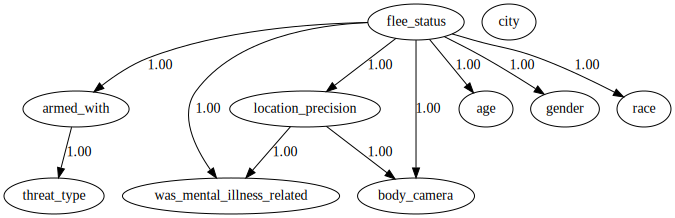

In [13]:
# Plot
# Make plot
# G = bn.plot(DAG, params_static={'figsize': (10,5), 'layout':'planar_layout'})

# Make nice plot
bn.plot_graphviz(DAG)


In [7]:
# Structure learning
DAG = bn.independence_test(DAG, df, prune=True)



[bnlearn] >Compute edge strength with [chi_square]


[20-09-2025 19:03:42] [setgraphviz.setgraphviz] [INFO] The OS is not supported to automatically set Graphviz in the system env.
[20-09-2025 19:03:42] [setgraphviz.setgraphviz] [INFO] The OS is not supported to automatically set Graphviz in the system env.
[20-09-2025 19:03:42] [setgraphviz.setgraphviz] [INFO] Graphviz path found in environment.
[20-09-2025 19:03:42] [setgraphviz.setgraphviz] [INFO] Graphviz path found in environment.


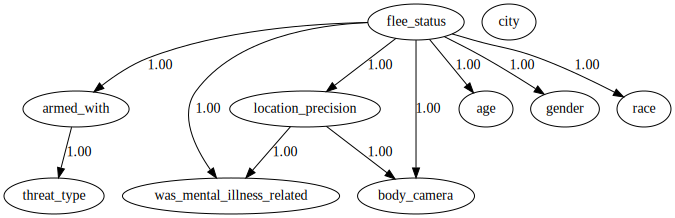

In [14]:
# Plot
#G = bn.plot(DAG)
bn.plot_graphviz(DAG)


In [9]:
# Parameter learning
model = bn.parameter_learning.fit(DAG, df)


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of flee_status:
+--------------------+-----------+
| flee_status(car)   | 0.189556  |
+--------------------+-----------+
| flee_status(foot)  | 0.160479  |
+--------------------+-----------+
| flee_status(not)   | 0.586075  |
+--------------------+-----------+
| flee_status(other) | 0.0638897 |
+--------------------+-----------+
[bnlearn] >CPD of armed_with:
+-----+----------------------+
| ... | flee_status(other)   |
+-----+----------------------+
| ... | 0.022787493375728676 |
+-----+----------------------+
| ... | 0.01324854266030737  |
+-----+----------------------+
| ... | 0.01324854266030737  |
+-----+----------------------+
| ... | 0.01324854266030737  |
+-----+----------------------+
| ... | 0.01324854266030737  |
+-----+----------------------+
| ... | 0.42978272390037103

##Inferences on the dataset.
Making inferences requires the Bayesian network to have two main components: A Directed Acyclic Graph (DAG) that describes the structure of the data and Conditional Probability Tables (CPT) that describe the statistical relationship between each node and its parents. At this point you have the dataset, you computed the DAG using structure learning and estimated the CPTs using parameter learning. You can now make inferences!

With inferences, we marginalize variables in a procedure that is called variable elimination. Variable elimination is an exact inference algorithm. It can also be used to figure out the state of the network that has maximum probability by simply exchanging the sums by max functions. Its downside is that for large BNs it might be computationally intractable. Approximate inference algorithms such as Gibbs sampling or rejection sampling might be used in these cases [7].

With bnlearn we can make inferences as follow:

In [10]:
# Make inference
q1 = bn.inference.fit(model, variables=['threat_type'], evidence={'flee_status': 'foot'})
q1 = bn.inference.fit(model, variables=['gender'], evidence={'threat_type': 'accident', 'armed_with': 'gun'})

# No connection in the DAG, thus the evidence should not influence the outcome
q1 = bn.inference.fit(model, variables=['body_camera'], evidence={'gender': 'male'})
q1 = bn.inference.fit(model, variables=['body_camera'], evidence={'armed_with': 'gun'})

print(q1)
print(q1.df)
# bn.print_CPD(model)


[bnlearn] >Variable Elimination.
+----+---------------+-----------+
|    | threat_type   |         p |
+====+===============+===========+
|  0 | accident      | 0.022841  |
+----+---------------+-----------+
|  1 | attack        | 0.114974  |
+----+---------------+-----------+
|  2 | flee          | 0.033536  |
+----+---------------+-----------+
|  3 | move          | 0.0635825 |
+----+---------------+-----------+
|  4 | point         | 0.1898    |
+----+---------------+-----------+
|  5 | shoot         | 0.291947  |
+----+---------------+-----------+
|  6 | threat        | 0.224661  |
+----+---------------+-----------+
|  7 | undetermined  | 0.0586584 |
+----+---------------+-----------+

Summary for variables: ['threat_type']
Given evidence: flee_status=foot

threat_type outcomes:
- threat_type: accident (2.3%)
- threat_type: attack (11.5%)
- threat_type: flee (3.4%)
- threat_type: move (6.4%)
- threat_type: point (19.0%)
- threat_type: shoot (29.2%)
- threat_type: threat (22.5%)
- t

## How do I know my causal model is right?
If you solely used data to compute the causal diagram, it is hard to fully verify the validity and completeness of your causal diagram. However, some solutions can help to get more trust in the causal diagram. For example, it may be possible to empirically test certain conditional independence or dependence relationships between sets of variables. If they are not in the data, it is an indication of the correctness of the causal model [8]. Alternatively, prior expert knowledge can be added, such as a DAG or CPTs, to get more trust in the model when making inferences.

A weakness of Bayesian networks is that finding the optimum DAG is computationally expensive since an exhaustive search over all the possible structures must be performed. The limit of nodes for exhaustive search can already be around 15 nodes but also depends on the number of states. If you have more nodes, alternative methods with a scoring function and search algorithm are required. Nevertheless, to deal with problems with hundreds or maybe even thousands of variables, a different approach, such as tree-based or constraint-based approaches is necessary with the use of black/whitelisting of variables. Such an approach first determines the order and then finds the optimal BN structure for that ordering. This implies working on the search space of the possible orderings, which is convenient as it is smaller than the space of network structures.


---

### Support
This library is for free but it runs on coffee! :)

You can [support](https://erdogant.github.io/pca/pages/html/Documentation.html) in various ways, have a look at the [sponser page](https://erdogant.github.io/bnlearn/pages/html/Documentation.html). Report bugs, issues and feature extensions at [github page](https://github.com/erdogant/bnlearn).

<table>
  <tr>
    <td style="text-align: center;">
      <a href="https://www.buymeacoffee.com/erdogant">
        <img src="https://img.buymeacoffee.com/button-api/?text=Buy me a coffee&emoji=&slug=erdogant&button_colour=FFDD00&font_colour=000000&font_family=Cookie&outline_colour=000000&coffee_colour=ffffff" />
      </a>
    </td>
    <td style="text-align: center;">
      <a href="https://erdogant.medium.com/subscribe" target="_blank">
        <img height="50" style="border:0px;height:36px;" src="https://erdogant.github.io/images/medium_follow_me.jpg" border="0" alt="Follow me on Medium" />
      </a>
    </td>
  </tr>
</table>
